## Instalar las dependencias

In [ ]:
# Instalar las librerias necesarias
!pip install --upgrade pip
!pip uninstall tensorflow protobuf
!pip install tensorflow protobuf
!source tu_entorno_virtual/bin/activate
!python -c "import tensorflow as tf; print(tf.__version__)"
!python -c "import tensorflow_datasets as tfds; print(tfds.__version__)"


In [2]:
#Red neuronal convolucional
import tensorflow as tf
import tensorflow_datasets as tdfs

2023-11-26 17:50:20.130825: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-26 17:50:28.304352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-26 17:50:28.361051: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-26 17:50:28.909627: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 17:50:43.862847: W tensorflow/stream_executor/platform/de

## Libreias

In [3]:
from  skimage.io import imread, imshow
import pywt
import pywt.data
import matplotlib.pyplot as plt
import numpy as np
import tqdm

## Funcion que obtiene las caracteristicas de una imagen

In [4]:
def Get_Feature(picture, cortes=3):
   LL = picture
   for i in range(cortes):
      LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
   return LL.flatten()

## Leer el datase

In [5]:
# Leer el dataset train
path_angry = 'archive/train/angry/'
path_disgusted = 'archive/train/disgusted/'
path_fearful = 'archive/train/fearful/'
path_happy = 'archive/train/happy/'
path_neutral = 'archive/train/neutral/'
path_sad = 'archive/train/sad/'
path_surprised = 'archive/train/surprised/'

import glob

x_train = []
y_train = []
for ip in tqdm.tqdm(glob.glob(path_angry + '*.png')):
    feat = Get_Feature(imread(ip))
    y_train.append(1)
    x_train.append(feat)

for ip in tqdm.tqdm(glob.glob(path_disgusted + '*.png')):
    feat = Get_Feature(imread(ip))
    y_train.append(-1)
    x_train.append(feat)

for ip in tqdm.tqdm(glob.glob(path_fearful + '*.png')):
    feat = Get_Feature(imread(ip))
    y_train.append(-1)
    x_train.append(feat)

for ip in tqdm.tqdm(glob.glob(path_happy + '*.png')):
    feat = Get_Feature(imread(ip))
    y_train.append(1)
    x_train.append(feat)

for ip in tqdm.tqdm(glob.glob(path_neutral + '*.png')):
    feat = Get_Feature(imread(ip))
    y_train.append(0)
    x_train.append(feat)

for ip in tqdm.tqdm(glob.glob(path_sad + '*.png')):
    feat = Get_Feature(imread(ip))
    y_train.append(-1)
    x_train.append(feat)

for ip in tqdm.tqdm(glob.glob(path_surprised + '*.png')):
    feat = Get_Feature(imread(ip))
    y_train.append(1)
    x_train.append(feat)



100%|██████████| 3171/3171 [00:03<00:00, 904.22it/s] 


In [6]:
# Leer el dataset test
path_test_angry = 'archive/test/angry/'
path_test_disgusted = 'archive/test/disgusted/'
path_test_fearful = 'archive/test/fearful/'
path_test_happy = 'archive/test/happy/'
path_test_neutral = 'archive/test/neutral/'
path_test_sad = 'archive/test/sad/'
path_test_surprised = 'archive/test/surprised/'

import glob

x_test = []
y_test = []
for ip in tqdm.tqdm(glob.glob(path_angry + '*.png')):
    feat = Get_Feature(imread(ip))
    y_test.append(1)
    x_test.append(feat)

for ip in tqdm.tqdm(glob.glob(path_disgusted + '*.png')):
    feat = Get_Feature(imread(ip))
    y_test.append(-1)
    x_test.append(feat)

for ip in tqdm.tqdm(glob.glob(path_fearful + '*.png')):
    feat = Get_Feature(imread(ip))
    y_test.append(-1)
    x_test.append(feat)

for ip in tqdm.tqdm(glob.glob(path_happy + '*.png')):
    feat = Get_Feature(imread(ip))
    y_test.append(1)
    x_test.append(feat)

for ip in tqdm.tqdm(glob.glob(path_neutral + '*.png')):
    feat = Get_Feature(imread(ip))
    y_test.append(0)
    x_test.append(feat)

for ip in tqdm.tqdm(glob.glob(path_sad + '*.png')):
    feat = Get_Feature(imread(ip))
    y_test.append(-1)
    x_test.append(feat)

for ip in tqdm.tqdm(glob.glob(path_surprised + '*.png')):
    feat = Get_Feature(imread(ip))
    y_test.append(1)
    x_test.append(feat)

  0%|          | 0/3995 [00:00<?, ?it/s]

100%|██████████| 3171/3171 [00:02<00:00, 1332.17it/s]


## Convertir a numpy

In [7]:
# Convertir a numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

## Normalizar

In [8]:
# Normalizar
x_train = x_train / 255.0
x_test = x_test / 255.0

# Normalizar las etiquetas
y_train = (y_train + 1) / 2
y_test = (y_test + 1) / 2


## Modelo

In [9]:
# Crear el modelo tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1000)

model.evaluate(x_test, y_test, verbose=2)

model.save('modelo.h5')

new_model = tf.keras.models.load_model('modelo.h5')
new_model.summary()

predictions = new_model.predict(x_test)
print("Prediction:", predictions)

2023-11-26 17:53:11.973381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-26 17:53:11.974402: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-26 17:53:11.974660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-11-26 17:53:11.974880: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-11-26 17:53:11.975095: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/1000
898/898 [==============================] - 3s 2ms/step - loss: 0.6803 - accuracy: 0.4945
Epoch 2/1000
898/898 [==============================] - 1s 2ms/step - loss: 0.6662 - accuracy: 0.5121
Epoch 3/1000
898/898 [==============================] - 2s 2ms/step - loss: 0.6628 - accuracy: 0.5170
Epoch 4/1000
898/898 [==============================] - 2s 2ms/step - loss: 0.6602 - accuracy: 0.5211
Epoch 5/1000
898/898 [==============================] - 2s 2ms/step - loss: 0.6589 - accuracy: 0.5218
Epoch 6/1000
898/898 [==============================] - 2s 2ms/step - loss: 0.6572 - accuracy: 0.5250
Epoch 7/1000
898/898 [==============================] - 2s 2ms/step - loss: 0.6562 - accuracy: 0.5270
Epoch 8/1000
898/898 [==============================] - 2s 2ms/step - loss: 0.6543 - accuracy: 0.5259
Epoch 9/1000
898/898 [==============================] - 2s 2ms/step - loss: 0.6527 - accuracy: 0.5313
Epoch 10/1000
898/898 [==============================] - 2s 2ms/step - loss: 0.650

In [10]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

898/898 [==============================] - 1s 919us/step


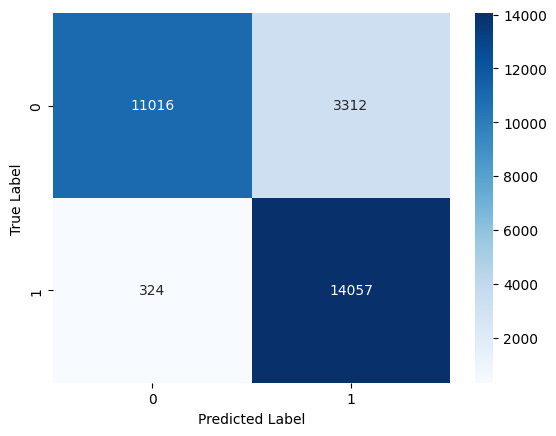

In [11]:
# Graficar la matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_int = y_test.astype(int)
y_pred = new_model.predict(x_test)
y_pred_int = (y_pred > 0.5).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_int, y_pred_int)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Epoch 1/1000
898/898 [==============================] - 1s 1ms/step - loss: 0.2338 - accuracy: 0.8980
Epoch 2/1000
898/898 [==============================] - 1s 1ms/step - loss: 0.2059 - accuracy: 0.9110
Epoch 3/1000
898/898 [==============================] - 1s 1ms/step - loss: 0.1890 - accuracy: 0.9200
Epoch 4/1000
898/898 [==============================] - 1s 1ms/step - loss: 0.1914 - accuracy: 0.9179
Epoch 5/1000
898/898 [==============================] - 1s 1ms/step - loss: 0.1853 - accuracy: 0.9212
Epoch 6/1000
898/898 [==============================] - 1s 1ms/step - loss: 0.1806 - accuracy: 0.9227
Epoch 7/1000
898/898 [==============================] - 1s 1ms/step - loss: 0.1821 - accuracy: 0.9230
Epoch 8/1000
898/898 [==============================] - 1s 1ms/step - loss: 0.1757 - accuracy: 0.9256
Epoch 9/1000
898/898 [==============================] - 1s 1ms/step - loss: 0.1784 - accuracy: 0.9248
Epoch 10/1000
898/898 [==============================] - 1s 1ms/step - loss: 0.175

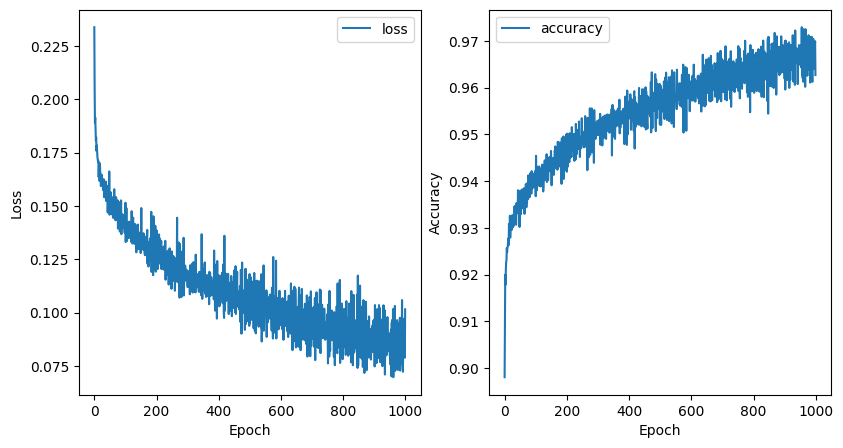

In [12]:
history = model.fit(x_train, y_train, epochs=1000)

# Gráfica de loss y accuracy
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(model.history.history['loss'], label='loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(132)
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"\nPrecisión: {test_accuracy}")

898/898 - 1s - loss: 0.0676 - accuracy: 0.9731 - 1s/epoch - 1ms/step

Precisión: 0.9731094837188721


## Modelo Boosting

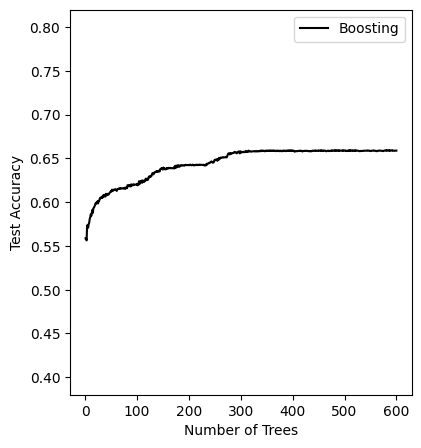

In [31]:
# Modelo Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(x_train, y_train)
bdt_discrete.fit(x_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(x_test), bdt_discrete.staged_predict(x_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))
    
n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         1 - np.array(discrete_test_errors), c='black', label='Boosting')
plt.legend()
plt.ylim(0.38, 0.82)
plt.ylabel('Test Accuracy')
plt.xlabel('Number of Trees')

plt.show()



In [29]:
y_pred_real = bdt_real.predict(x_test)
y_pred_discrete = bdt_discrete.predict(x_test)

accuracy_real = accuracy_score(y_pred_real, y_test)
accuracy_discrete = accuracy_score(y_pred_discrete, y_test)

print("Precision Real:", accuracy_real)
print("Precision Discrete:", accuracy_discrete)



Precision Real: 0.7692012957609112
Precision Discrete: 0.6589919537427288


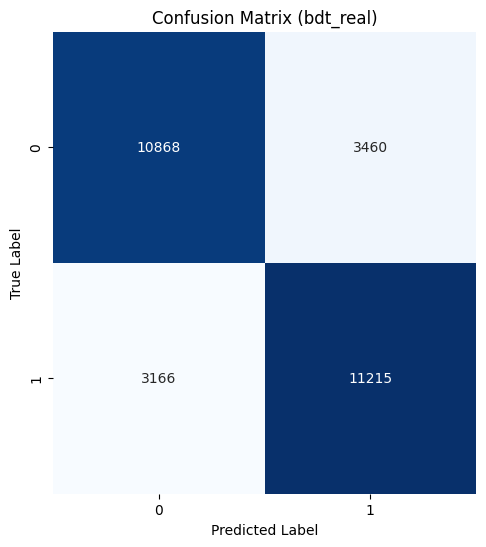

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones en el conjunto de prueba
y_pred_real = bdt_real.predict(x_test)
y_pred_discrete = bdt_discrete.predict(x_test)

cm_real = confusion_matrix(y_test, y_pred_real)
cm_discrete = confusion_matrix(y_test, y_pred_discrete)

# Etiquetas de las clases
class_names = set(y_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_real, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (bdt_real)")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


In [17]:
# Presición
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_real, average='macro')
print("Precision:", precision_score(y_test, y_pred_real, average='macro'))

Precision: 0.7693149443102283


## Arbol de Desiciones

In [18]:
def negate_pred(pred):
  def f(*args, **kwargs):
    return not pred(*args, **kwargs)

  return f

In [19]:
from collections import Counter
import numpy as np

class Nodo:
    def __init__(self, features, labels, index):
        self.features = features
        self.labels = labels
        self.index = index

    def isTerminal(self):
        return len(np.unique(self.labels)) <= 1 or len(self.labels) == 0

    def split(self, max_depth=None, min_samples_split=2):
        if self.isTerminal() or (max_depth is not None and max_depth == 0) or len(self.labels) <= min_samples_split:
            return

        self.left, self.right = self.BestSplit()
        
        if self.left:
            self.left.split(max_depth=max_depth - 1 if max_depth is not None else None, min_samples_split=min_samples_split)
        if self.right:
            self.right.split(max_depth=max_depth - 1 if max_depth is not None else None, min_samples_split=min_samples_split)

    def BestSplit(self):
        def make_test(i, mean):
            def test(tup):
                return tup[i] <= mean

            return test

        candidates = []
        for i in range(self.features.shape[1]):
            percentiles = [1, 10, 25, 50, 75, 90, 99]
            v_values = np.percentile(self.features[:, i], percentiles)
            candidates.extend(make_test(i, v) for v in v_values)

        if not candidates:
            return (None, None)

        best_split = (None, float('inf'))
        for test in candidates:
            left_indices = np.where(test(self.features))
            right_indices = np.where(~test(self.features))

            if len(left_indices[0]) == 0 or len(right_indices[0]) == 0:
                continue

            nodo_left = Nodo(self.features[left_indices], self.labels[left_indices], test)
            nodo_right = Nodo(self.features[right_indices], self.labels[right_indices], negate_pred(test))

            split_entropy = nodo_left.entropy() * len(nodo_left.features) + nodo_right.entropy() * len(nodo_right.features)

            if split_entropy < best_split[1]:
                best_split = ((nodo_left, nodo_right), split_entropy)

        return best_split[0]

    def entropy(self):
        count = Counter(self.labels)
        total = sum(count.values())
        return sum(pi_mc * (1 - pi_mc) for pi_mc in (c / total for c in count.values()))

In [20]:
class DT:
    def __init__(self, features, labels, max_depth=None, min_samples_split=2):
        self.m_Root = Nodo(features, labels, lambda t: True)
        self.m_Root.split(max_depth, min_samples_split)

    def predict(self, x):
        cur = self.m_Root
        while not cur.isTerminal():
            if cur.left.index(x):
                cur = cur.left
            elif cur.right.index(x):
                cur = cur.right
            else:
                print(cur.left.index(x), cur.right.index(x))
                print('F')
                assert False

        return cur.labels[0]

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train / 255.0
x_test = x_test / 255.0

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

if len(x_train) == 0 or len(x_test) == 0:
    raise ValueError("Los conjuntos de entrenamiento o prueba están vacíos. Verifica las rutas de los archivos de imágenes.")

dt = DT(x_train, y_train_encoded, max_depth=5, min_samples_split=5)

if len(x_test) == 0:
    raise ValueError("El conjunto de prueba está vacío. Verifica las rutas de los archivos de imágenes.")

y_pred_dt = np.array([dt.predict(x) for x in x_test])

y_pred_original = label_encoder.inverse_transform(y_pred_dt)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_original)
precision = precision_score(y_test, y_pred_original, average='weighted')


print("Accuracy:", accuracy)
print("Precision:", precision)



Accuracy: 0.5009230554878261
Precision: 0.25092390751925975


/home/lenovo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


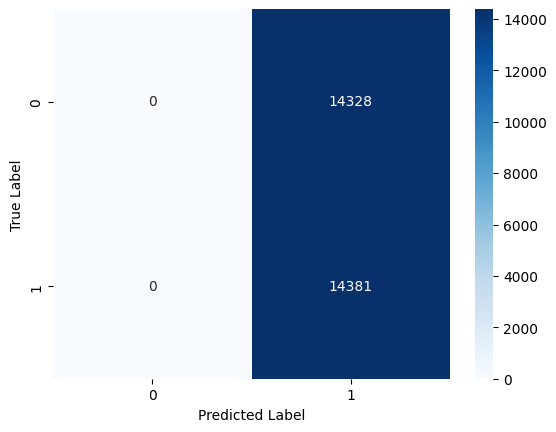

In [22]:
# Graficar la matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_int = y_test.astype(int)
y_pred_int = (y_pred_dt > 0.5).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_int, y_pred_int)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



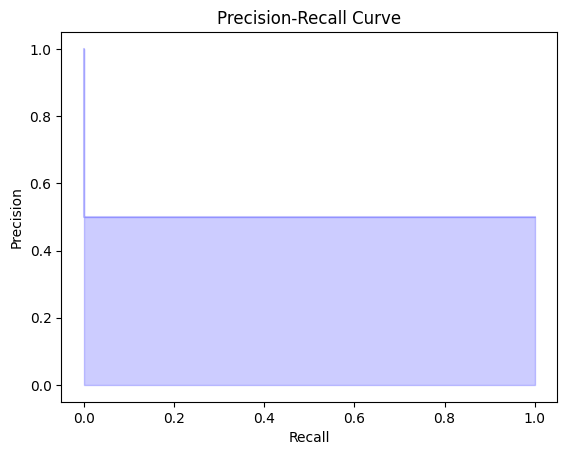

In [23]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_dt)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
